In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('california_housing_train.csv')
data_df=df.copy()

In [3]:
data_df.info()
print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
(No of rows, No of Columns) =  (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [12]:
arr = np.array(df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_train = np.array(df['median_house_value'])
x_train = arr.T

print(x_train.shape,y_train.shape)

(17000, 8) (17000,)


In [8]:
def loss(y_pred,y_true):
    squared_diff=(y_pred-y_true)**2
    mse=squared_diff.mean()
    return mse

In [13]:
def y_prediction(x,a,b):
    m,n=x.shape
    y_pred=np.dot(x,a)+b
    assert(y_pred.shape == (m,))
    return y_pred

In [14]:
def gradient(x,a,b,y_true):
    m,n=x.shape
    yp=np.dot(x,a)+b
    diff=yp-y_true
    da=(2/m)*np.dot(diff,x)
    db=(2/m)*np.sum(diff)
    assert(da.shape ==(n,))
    return (da,db)
    

In [42]:
type(train_loss)

list

In [22]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
    m,n = x.shape
    loss_mse = []                                 
    a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)     
    b = 0
    
    for i in range(epochs):
        da,db=gradient(x,a,b,y_true)
        a=a-learning_rate*da
        b=b-learning_rate*db
        yp=np.dot(x,a)+b
        Loss=loss(yp,y_true)
        loss_mse.append(loss)
        print("Epoch ",i+1," Completed!","loss = ",Loss) 


    
    print("Training completed!!")
    assert(a.shape==(n,))
    return (loss_mse,a,b)
    

In [47]:
epochs = 200             
learn_rate = 0.02         

train_loss,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)
print(train_loss)



Epoch  1  Completed! loss =  52490455426.39653
Epoch  2  Completed! loss =  48866254681.53561
Epoch  3  Completed! loss =  45527310861.4208
Epoch  4  Completed! loss =  42450637928.01794
Epoch  5  Completed! loss =  39615227680.61193
Epoch  6  Completed! loss =  37001845529.85236
Epoch  7  Completed! loss =  34592856225.47412
Epoch  8  Completed! loss =  32372073200.413696
Epoch  9  Completed! loss =  30324626837.09453
Epoch  10  Completed! loss =  28436848145.86276
Epoch  11  Completed! loss =  26696165202.0058
Epoch  12  Completed! loss =  25091010309.867027
Epoch  13  Completed! loss =  23610736316.831196
Epoch  14  Completed! loss =  22245540833.84101
Epoch  15  Completed! loss =  20986397366.45751
Epoch  16  Completed! loss =  19824992545.451283
Epoch  17  Completed! loss =  18753668785.76446
Epoch  18  Completed! loss =  17765371809.75544
Epoch  19  Completed! loss =  16853602553.768198
Epoch  20  Completed! loss =  16012373042.59594
Epoch  21  Completed! loss =  15236165868.8937

Loss on test data =  5241482054.232452


TypeError: float() argument must be a string or a real number, not 'function'

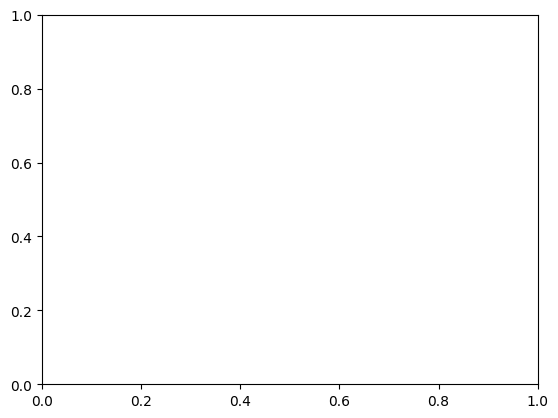

In [48]:
test_df = pd.read_csv("california_housing_train.csv")

arr = np.array(test_df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_test = np.array(test_df['median_house_value'])                                                                                                            # extract the price column from data

x_test = arr.T
y_pred=np.dot(x_test,a)+b
diff=(y_pred-y_test)**2
test_loss =diff.mean()

print("Loss on test data = ",test_loss)
plt.plot([i for i in range(epochs)], train_loss)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
